# Problem

The data set has two parts:
- One has a continous target varibale which tells us the quantity of rainfall the next day.
- The other is a classification problem which has a binary target variable which tells us whether or not it willrain the following day.

# Importing Relevant Packages

In [401]:
# Import necessary packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [402]:
# Reading data into our dataframe.

data = pd.read_csv("weatherAUS_Rain_MM.csv")

In [403]:
# Show first 5 entries.

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0
1,07-03-2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2
3,03-04-2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0
4,09-09-2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4


In [404]:
data.shape

(36881, 23)

In [405]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
dtype: int64

In [406]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36543 non-null  float64
 3   MaxTemp        36639 non-null  float64
 4   Rainfall       36255 non-null  float64
 5   Evaporation    24035 non-null  float64
 6   Sunshine       23317 non-null  float64
 7   WindGustDir    33513 non-null  object 
 8   WindGustSpeed  33520 non-null  float64
 9   WindDir9am     34072 non-null  object 
 10  WindDir3pm     35919 non-null  object 
 11  WindSpeed9am   36219 non-null  float64
 12  WindSpeed3pm   36235 non-null  float64
 13  Humidity9am    36311 non-null  float64
 14  Humidity3pm    36370 non-null  float64
 15  Pressure9am    33309 non-null  float64
 16  Pressure3pm    33329 non-null  float64
 17  Cloud9am       24381 non-null  float64
 18  Cloud3

In [407]:
# No duplicated rows
data.duplicated().nunique()

1

In [408]:
# No duplicated rows
data[data.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM


# Checking for missing values

In [409]:
#!pip install missingno

<AxesSubplot:>

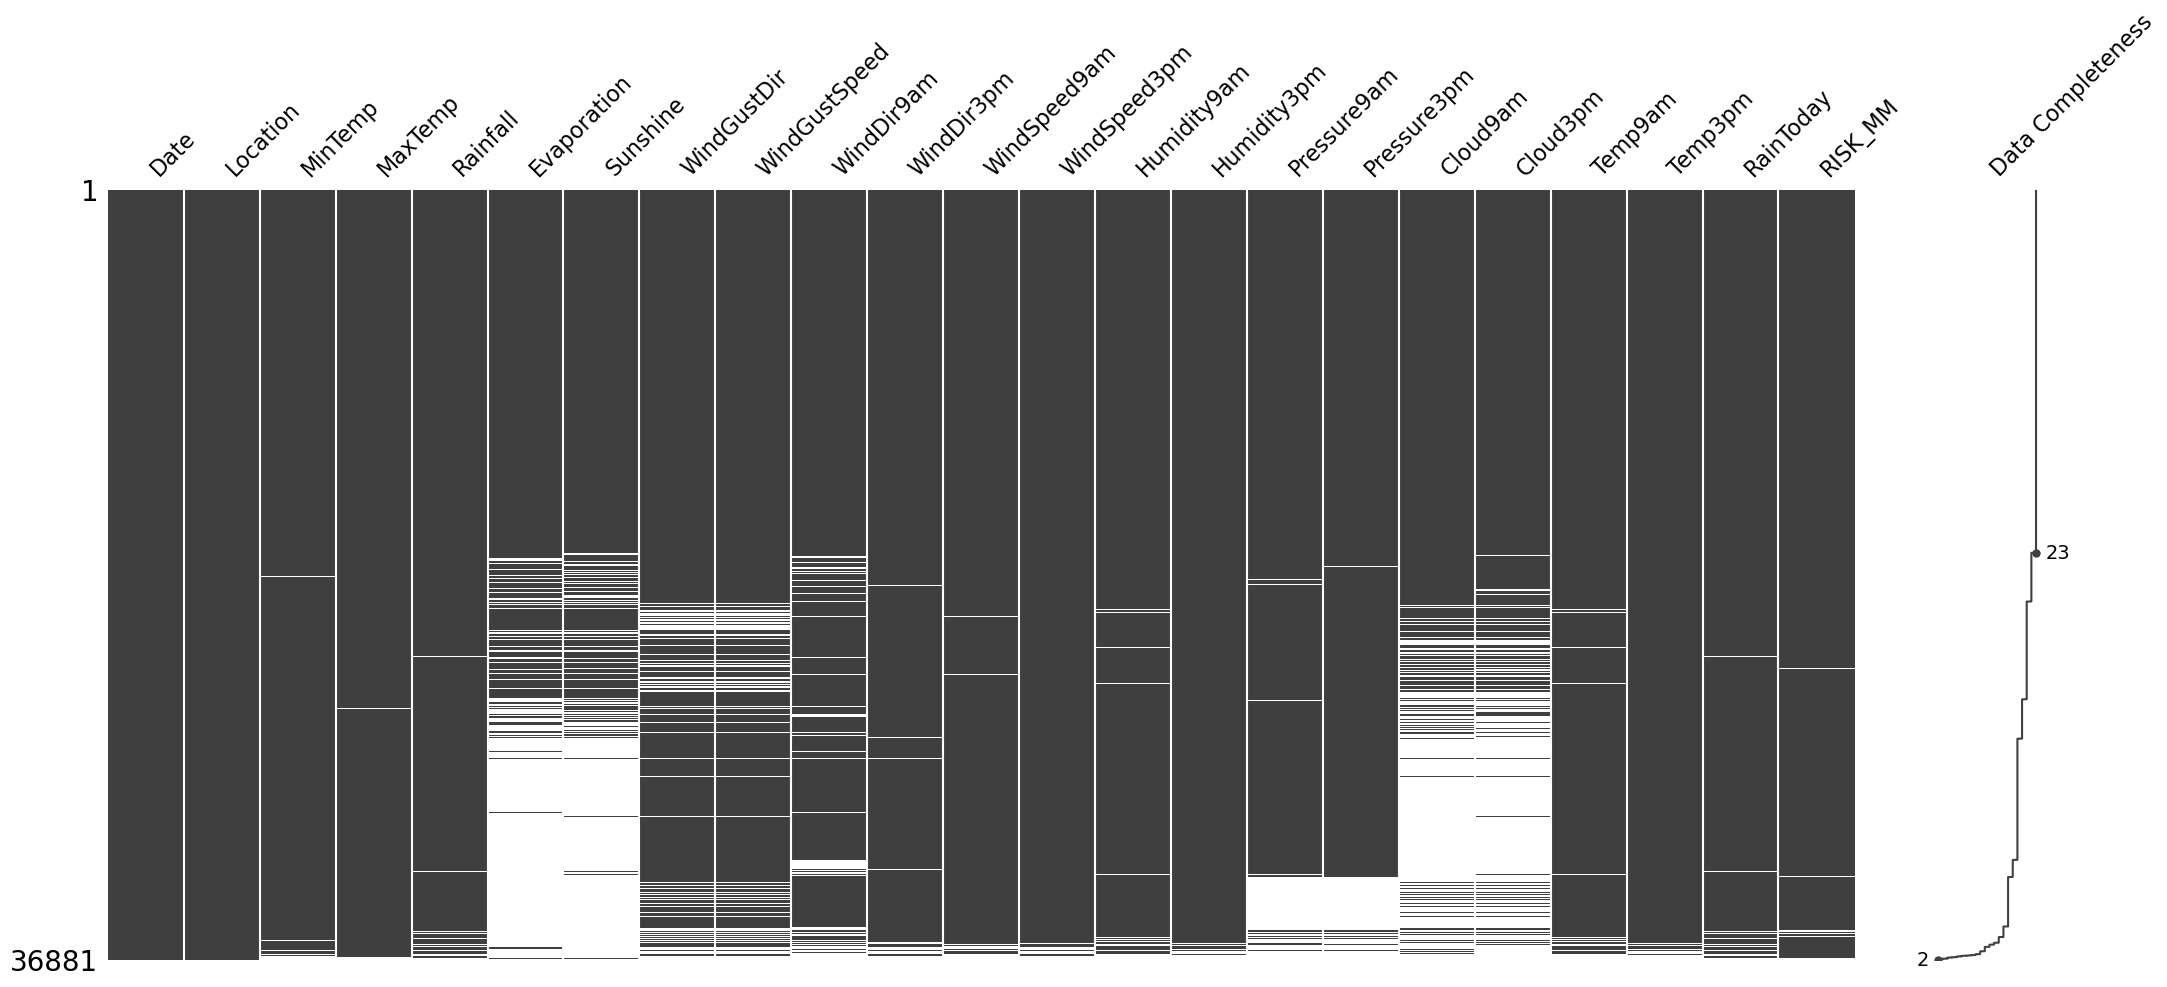

In [410]:
import missingno as msno
msno.matrix(data,labels=True, sort="descending")

In [411]:
data=data[data["RISK_MM"].isnull()==False]
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0
1,07-03-2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2
3,03-04-2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0
4,09-09-2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,6/14/2011,Perth,10.1,14.2,7.4,3.4,0.0,NNE,46.0,NNE,...,84.0,81.0,1016.2,1014.5,7.0,8.0,10.4,13.9,Yes,9.0
36877,9/24/2010,PerthAirport,6.3,26.0,0.0,5.0,10.6,W,37.0,N,...,38.0,45.0,1024.2,1021.5,1.0,1.0,18.4,23.5,No,0.0
36878,05-06-2011,Darwin,20.5,31.7,0.0,7.0,11.1,E,37.0,E,...,54.0,39.0,1012.6,1009.0,2.0,5.0,25.7,30.5,No,0.0
36879,10-12-2010,Perth,6.3,23.3,0.0,5.2,11.6,SSW,39.0,E,...,50.0,41.0,1023.9,1019.9,0.0,1.0,16.4,20.9,No,0.0


# Plotting unique values for numerical columns

<AxesSubplot:title={'center':'Unique values per feature'}>

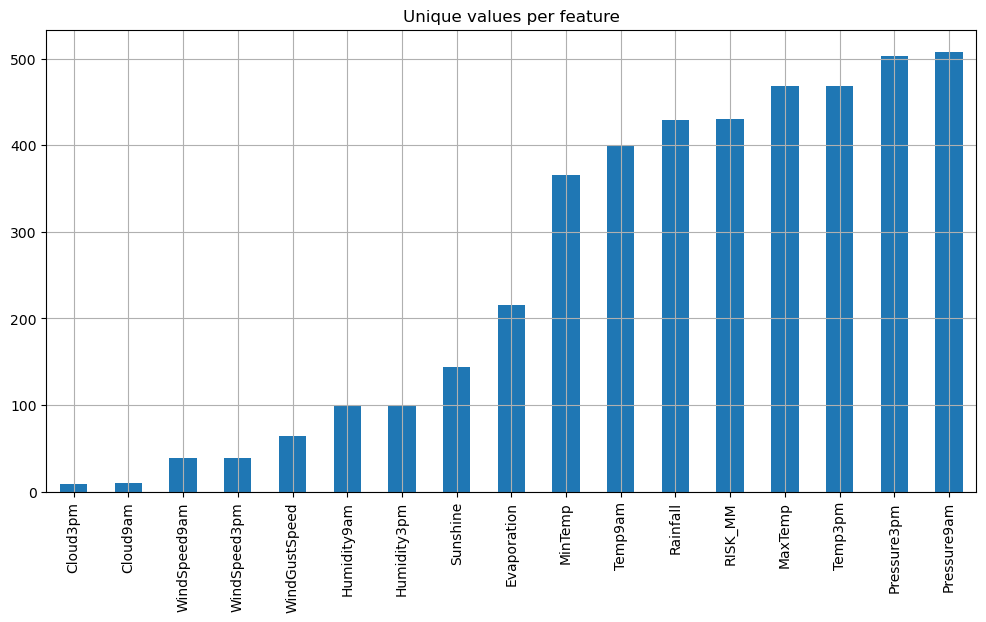

In [412]:
# For each numerical feature compute number of unique entries
unique_val = data.select_dtypes(include=np.number).nunique().sort_values()
unique_val

# Plot information with y-axis 
unique_val.plot(kind = 'bar', figsize=(12, 6), title="Unique values per feature", grid = True)

In [413]:
# .shape[1] gives nth positional argument of shape.

data.select_dtypes(include=np.number).shape[1]

17

# Non-numerical columns

In [414]:
# Display non-numerical features

categorical_cols = data.select_dtypes(exclude=np.number).head()
categorical_cols

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,5/18/2009,Hobart,NW,WSW,SSE,No
1,07-03-2009,Launceston,SSW,E,SW,No
2,2/18/2010,Williamtown,SSE,SSE,SSE,No
3,03-04-2010,PerthAirport,SW,SSE,SW,No
4,09-09-2010,GoldCoast,NNW,WNW,N,No


In [415]:
# data.describe(exclude=np.number)

In [416]:
categorical=[]
for col in data.columns:
    if data[col].dtype != np.number:
        categorical.append(col)
print(categorical, '\n', len(categorical))

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'] 
 6


In [417]:
data[categorical].isnull().sum()

Date              0
Location          0
WindGustDir    3022
WindDir9am     2614
WindDir3pm      801
RainToday       349
dtype: int64

In [418]:
for cat in categorical:
    print(cat, ' contains ', data[cat].nunique(), ' labels')

Date  contains  1473  labels
Location  contains  46  labels
WindGustDir  contains  16  labels
WindDir9am  contains  16  labels
WindDir3pm  contains  16  labels
RainToday  contains  2  labels


In [419]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')

# Date

In [420]:
data["Date"].dtype

dtype('O')

In [421]:
data['Date'] = pd.to_datetime(data['Date'])

In [422]:
data['Year'] = data['Date'].dt.year

data['Year'].head()

0    2009
1    2009
2    2010
3    2010
4    2010
Name: Year, dtype: int64

In [423]:
data['Month'] = data['Date'].dt.month

data['Month'].head()

0    5
1    7
2    2
3    3
4    9
Name: Month, dtype: int64

In [424]:
data['Day'] = data['Date'].dt.day

data['Day'].head()

0    18
1     3
2    18
3     4
4     9
Name: Day, dtype: int64

In [425]:
data.drop('Date', axis=1, inplace = True)

In [426]:
data.head(15)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
0,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,SSE,...,1022.2,1.0,1.0,9.1,13.3,No,0.0,2009,5,18
1,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,SW,...,1002.4,NaN,NaN,1.3,13.7,No,0.0,2009,7,3
2,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,SSE,...,1021.9,6.0,4.0,22.7,24.4,No,0.2,2010,2,18
3,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,SW,...,1014.9,6.0,1.0,20.0,26.1,No,0.0,2010,3,4
4,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,N,...,1015.0,NaN,NaN,22.2,22.6,No,0.4,2010,9,9
5,Mildura,15.7,27.3,0.0,11.2,5.6,N,65.0,ENE,SW,...,995.5,8.0,7.0,18.1,18.5,No,5.6,2011,9,28
6,Nuriootpa,9.8,23.9,0.0,4.4,10.5,SE,35.0,ENE,NNE,...,1013.9,3.0,4.0,15.5,23.0,No,0.2,2011,10,13
7,NorahHead,18.7,27.6,3.0,NaN,NaN,SSE,41.0,WNW,S,...,1011.0,NaN,NaN,22.4,24.0,Yes,0.2,2010,4,8
8,Townsville,23.6,30.1,0.0,11.4,10.8,E,57.0,ESE,E,...,1018.0,4.0,2.0,27.4,27.9,No,0.0,2009,10,19
9,MountGambier,8.5,22.9,1.4,4.2,12.5,SSW,41.0,SSE,SSE,...,1022.1,1.0,2.0,16.4,22.1,Yes,0.0,2010,2,23


# Location

In [427]:
print('Location contains', len(data.Location.unique()), 'labels')

Location contains 46 labels


In [428]:
data.Location.unique()

array(['Hobart', 'Launceston', 'Williamtown', 'PerthAirport', 'GoldCoast',
       'Mildura', 'Nuriootpa', 'NorahHead', 'Townsville', 'MountGambier',
       'MelbourneAirport', 'SydneyAirport', 'Darwin', 'Newcastle',
       'Watsonia', 'CoffsHarbour', 'MountGinini', 'Sale', 'PearceRAAF',
       'Adelaide', 'Albury', 'Richmond', 'Walpole', 'Cairns',
       'BadgerysCreek', 'AliceSprings', 'Bendigo', 'SalmonGums',
       'Canberra', 'Ballarat', 'Woomera', 'Penrith', 'WaggaWagga',
       'Dartmoor', 'Perth', 'Cobar', 'Sydney', 'Melbourne',
       'NorfolkIsland', 'Tuggeranong', 'Albany', 'Moree', 'Wollongong',
       'Portland', 'Brisbane', 'Witchcliffe'], dtype=object)

<AxesSubplot:>

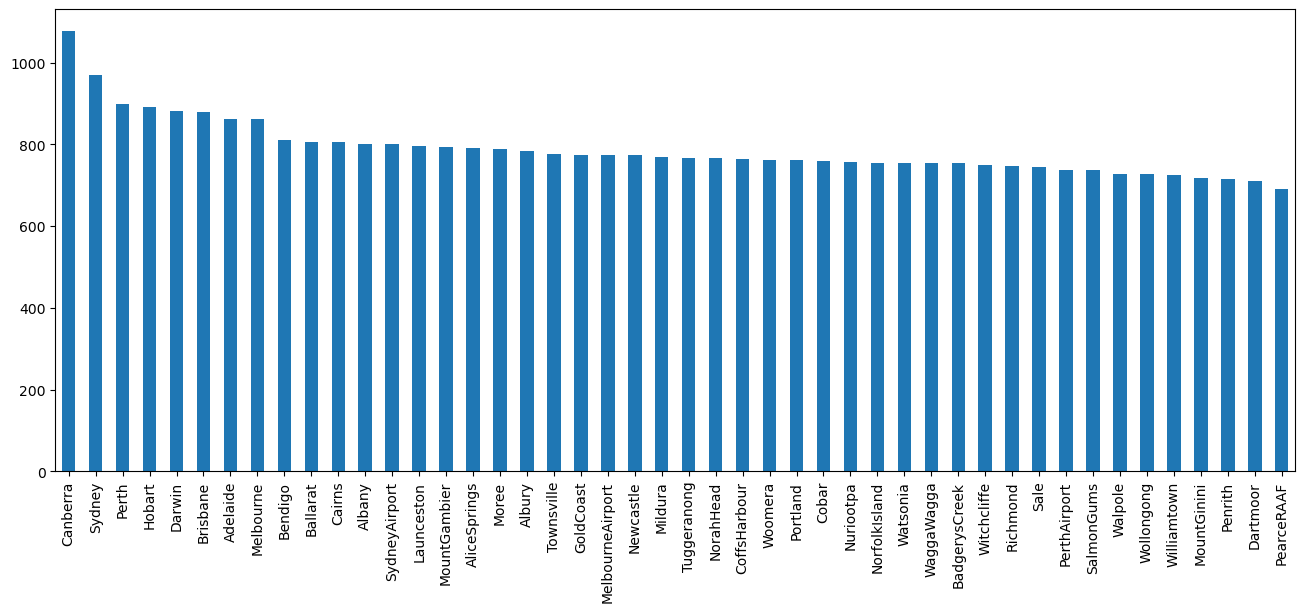

In [429]:
plt.figure(figsize =(16, 6))
data["Location"].value_counts().plot(kind="bar")

# WindGustDir

In [430]:
print('WindGustDir', len(data.WindGustDir.unique()), 'labels')

WindGustDir 17 labels


In [431]:
data['WindGustDir'].unique()

array(['NW', 'SSW', 'SSE', 'SW', 'NNW', 'N', 'SE', 'E', 'S', 'WSW', 'W',
       nan, 'NE', 'NNE', 'WNW', 'ESE', 'ENE'], dtype=object)

<AxesSubplot:>

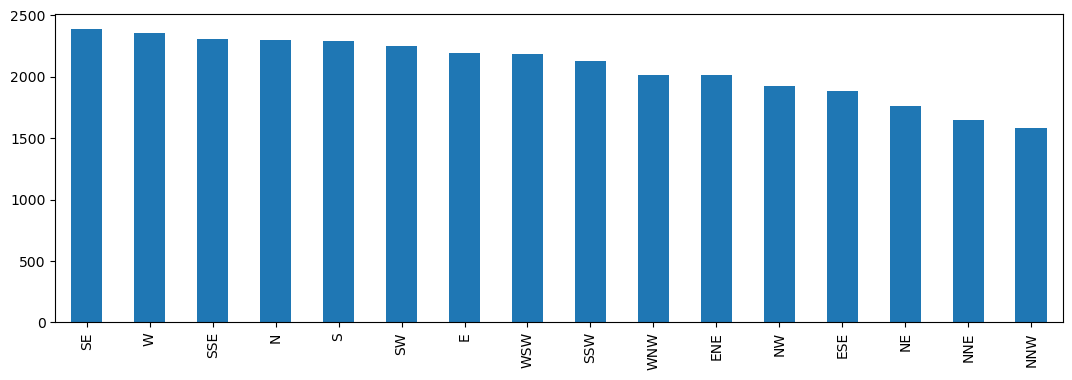

In [432]:
plt.figure(figsize =(13, 4))
data["WindGustDir"].value_counts().plot(kind="bar")

# WindDir9am

In [433]:
print('WindDir9am contains', len(data['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [434]:
data['WindDir9am'].unique()

array(['WSW', 'E', 'SSE', 'WNW', 'ENE', 'ESE', 'NW', nan, 'NE', 'SE',
       'NNW', 'N', 'W', 'NNE', 'S', 'SW', 'SSW'], dtype=object)

<AxesSubplot:>

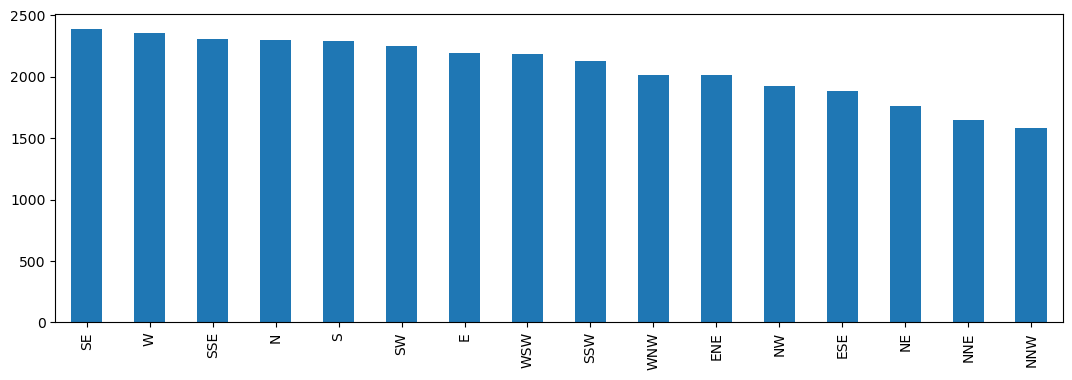

In [435]:
plt.figure(figsize =(13, 4))
data["WindGustDir"].value_counts().plot(kind="bar")

# RainToday

In [436]:
print('RainToday contains', len(data['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [437]:
data['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

<AxesSubplot:>

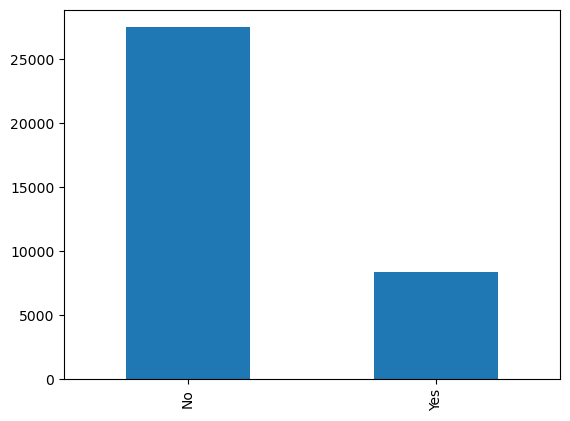

In [438]:
data.RainToday.value_counts().plot(kind="bar")

# Numerical Variables

In [439]:
#extracting again to avoid confusion with previous manipulation

numerical=[]
for num in data.columns:
    if data[num].dtype == np.number:
        numerical.append(num)
print(numerical)
print(len(numerical))

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']
17


<AxesSubplot:>

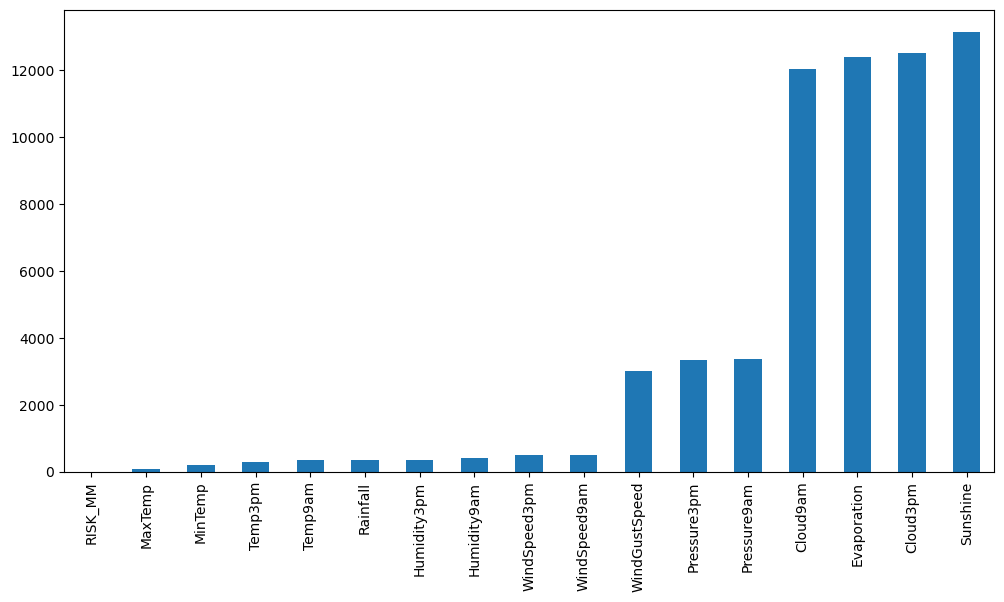

In [440]:
plt.figure(figsize=(12,6))
data[numerical].isnull().sum().sort_values().plot(kind="bar")

In [441]:
data[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,36056.0,12.252549,6.387194,-8.5,7.6,12.1,17.000,30.5
MaxTemp,36176.0,22.968045,6.978047,-3.1,17.8,22.4,27.925,48.1
Rainfall,35912.0,2.548953,9.075119,0.0,0.0,0.0,0.800,371.0
Evaporation,23869.0,5.192928,3.771129,0.0,2.6,4.6,7.000,81.2
Sunshine,23106.0,7.545516,3.832795,0.0,4.7,8.4,10.600,14.3
WindGustSpeed,33246.0,40.382572,13.537023,7.0,31.0,39.0,48.000,135.0
WindSpeed9am,35755.0,14.213453,8.986999,0.0,7.0,13.0,20.000,87.0
WindSpeed3pm,35771.0,18.881077,8.795042,0.0,13.0,19.0,24.000,87.0
Humidity9am,35845.0,69.109137,18.306222,2.0,57.0,70.0,83.000,100.0
Humidity3pm,35903.0,52.255466,20.323059,1.0,38.0,53.0,66.000,100.0


In [442]:
cor=data[numerical].corr()

<AxesSubplot:>

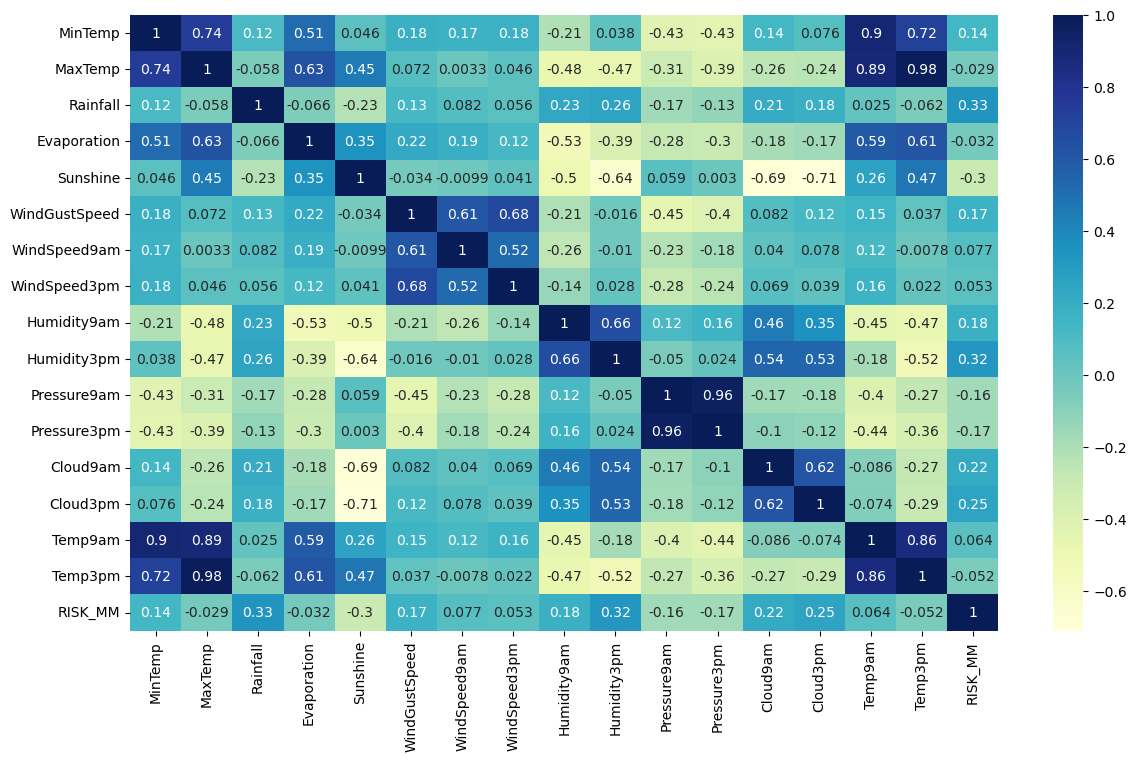

In [443]:
plt.figure(figsize=(14,8))
sns.heatmap(cor,annot=True,cmap="YlGnBu")

# Checking box-plot to detect outliers

Text(0, 0.5, 'WindSpeed3pm')

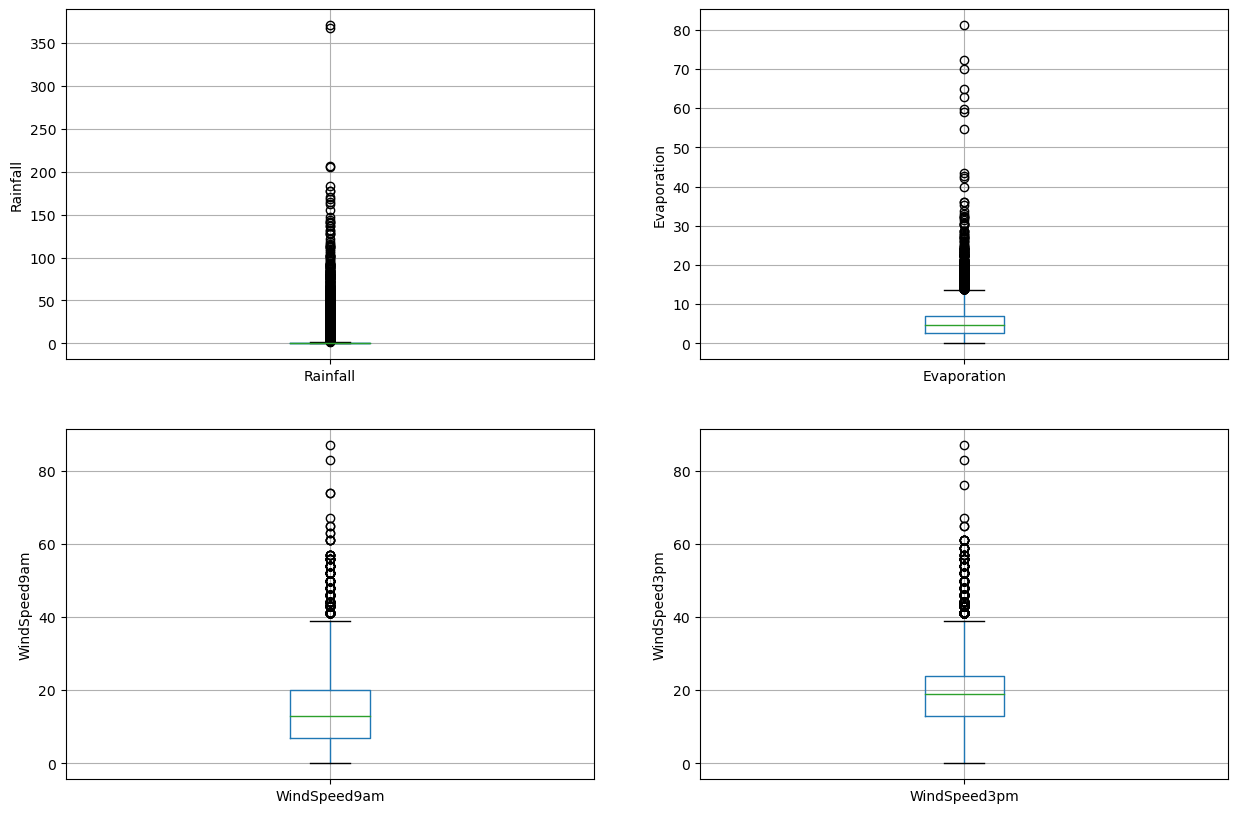

In [444]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2, 2, 2)
fig = data.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2, 2, 3)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')


Text(0, 0.5, 'Humidity9am')

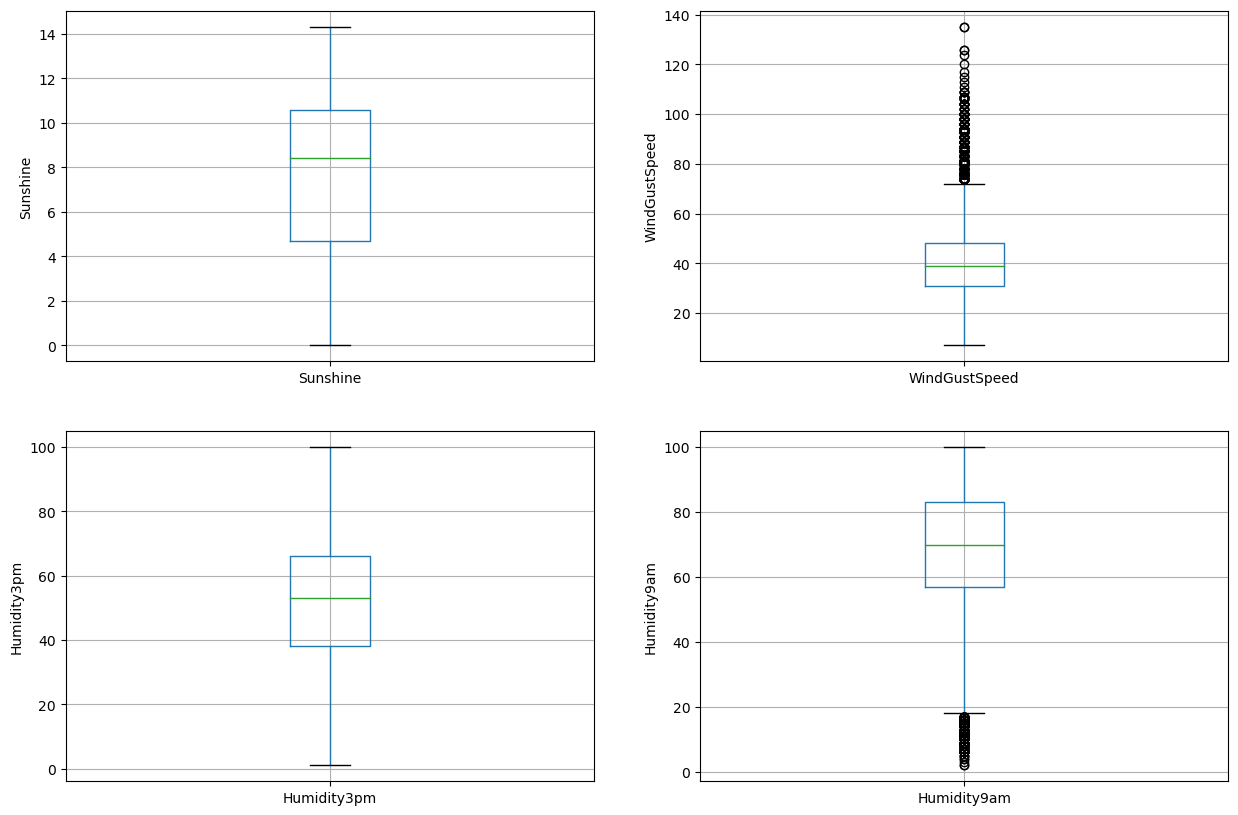

In [445]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data.boxplot(column='Sunshine')
fig.set_title('')
fig.set_ylabel('Sunshine')

plt.subplot(2, 2, 2)
fig = data.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

plt.subplot(2, 2, 3)
fig = data.boxplot(column='Humidity3pm')
fig.set_title('')
fig.set_ylabel('Humidity3pm')

plt.subplot(2, 2, 4)
fig = data.boxplot(column='Humidity9am')
fig.set_title('')
fig.set_ylabel('Humidity9am')


# checking distribution of rainfall,evaporation, windspeed9am and windspeed3pm

Text(0.5, 0, 'WindSpeed3pm')

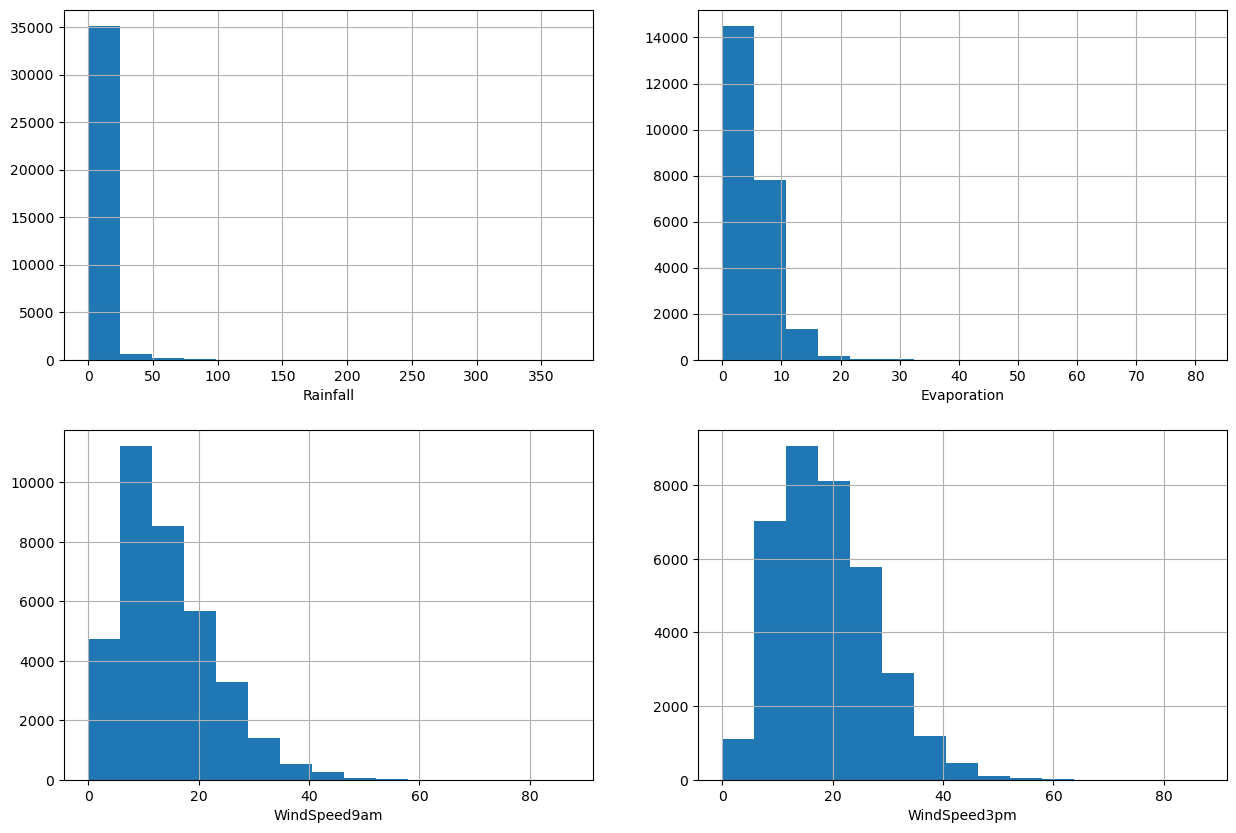

In [446]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=15)
fig.set_xlabel('Rainfall')

plt.subplot(2, 2, 2)
fig = data.Evaporation.hist(bins=15)
fig.set_xlabel('Evaporation')

plt.subplot(2, 2, 3)
fig = data.WindSpeed9am.hist(bins=15)
fig.set_xlabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = data.WindSpeed3pm.hist(bins=15)
fig.set_xlabel('WindSpeed3pm')

Text(0.5, 0, 'Humidity9am')

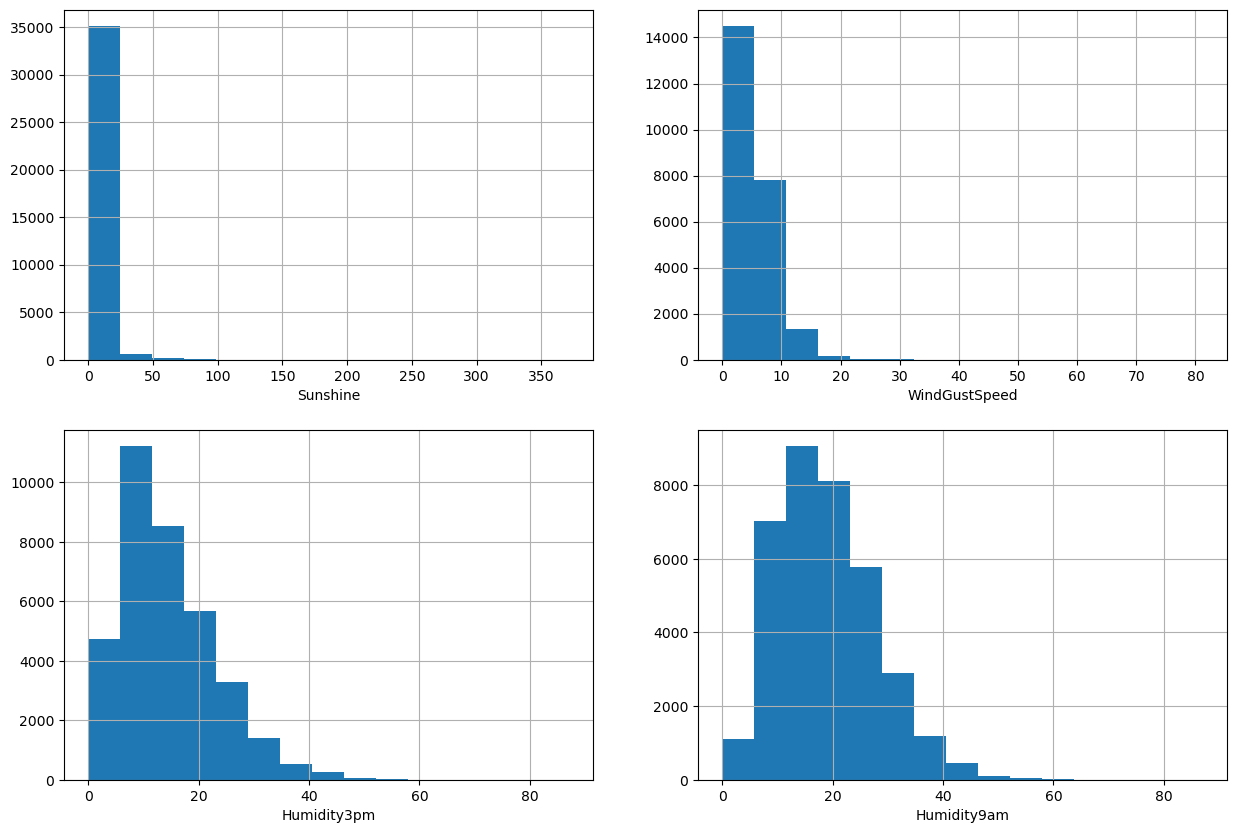

In [447]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=15)
fig.set_xlabel('Sunshine')

plt.subplot(2, 2, 2)
fig = data.Evaporation.hist(bins=15)
fig.set_xlabel('WindGustSpeed')

plt.subplot(2, 2, 3)
fig = data.WindSpeed9am.hist(bins=15)
fig.set_xlabel('Humidity3pm')

plt.subplot(2, 2, 4)
fig = data.WindSpeed3pm.hist(bins=15)
fig.set_xlabel('Humidity9am')

# detecting Outliers by IQR

In [448]:
IQR = data.Rainfall.quantile(0.75) - data.Rainfall.quantile(0.25)
Lower_fence = data.Rainfall.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Rainfall.quantile(0.75) + (IQR * 1.5)
print('Rainfall outliers are values <', Lower_fence, 'or >', Upper_fence)

Rainfall outliers are values < -1.2000000000000002 or > 2.0


In [449]:
data[data["Rainfall"] < -1.2]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [450]:
data[data["Rainfall"] >2.0]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
7,NorahHead,18.7,27.6,3.0,NaN,NaN,SSE,41.0,WNW,S,...,1011.0,NaN,NaN,22.4,24.0,Yes,0.2,2010,4,8
15,Launceston,10.7,18.0,6.0,NaN,NaN,W,33.0,SSE,NW,...,1000.1,NaN,NaN,14.7,15.9,Yes,6.0,2009,11,22
21,NorahHead,13.8,19.2,18.6,NaN,NaN,SSE,61.0,SE,S,...,1021.4,NaN,NaN,15.9,15.6,Yes,10.8,2010,11,5
23,Launceston,14.4,21.1,4.4,NaN,NaN,N,57.0,ENE,N,...,1005.8,NaN,NaN,21.0,17.4,Yes,3.0,2010,10,31
33,Adelaide,12.5,20.0,4.2,NaN,9.9,SW,33.0,S,WSW,...,1022.3,NaN,NaN,16.2,19.7,Yes,0.0,2010,4,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36867,Sydney,19.2,27.4,17.0,8.4,6.6,NaN,NaN,WNW,E,...,1007.8,2.0,3.0,21.7,25.0,Yes,0.4,2009,3,15
36868,Albany,18.2,19.5,12.6,5.4,0.0,NaN,NaN,S,SSE,...,1013.8,8.0,7.0,18.8,19.0,Yes,0.0,2010,1,25
36869,Witchcliffe,7.8,19.4,7.8,NaN,NaN,WSW,28.0,NNW,SW,...,1006.8,NaN,NaN,13.0,17.7,Yes,1.8,2009,6,25
36872,Watsonia,9.3,18.2,14.2,4.0,10.2,WSW,24.0,NaN,SE,...,1018.9,4.0,0.0,12.4,17.5,Yes,0.0,2009,9,18


In [451]:
IQR = data.Evaporation.quantile(0.75) - data.Evaporation.quantile(0.25)
Lower_fence = data.Evaporation.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Evaporation.quantile(0.75) + (IQR * 1.5)
print('Evaporation outliers are values <', Lower_fence, 'or >', Upper_fence)

Evaporation outliers are values < -4.0 or > 13.600000000000001


In [452]:
data[data["Evaporation"] < -0.6]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [453]:
data[data["Evaporation"] > 8.599]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
3,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,SW,...,1014.9,6.0,1.0,20.0,26.1,No,0.0,2010,3,4
5,Mildura,15.7,27.3,0.0,11.2,5.6,N,65.0,ENE,SW,...,995.5,8.0,7.0,18.1,18.5,No,5.6,2011,9,28
8,Townsville,23.6,30.1,0.0,11.4,10.8,E,57.0,ESE,E,...,1018.0,4.0,2.0,27.4,27.9,No,0.0,2009,10,19
12,Launceston,12.9,21.7,1.4,18.0,NaN,S,24.0,SSE,NNE,...,1024.2,NaN,NaN,15.2,19.8,Yes,0.0,2009,2,16
29,PerthAirport,14.3,38.2,0.0,12.0,13.0,WSW,48.0,NNE,WSW,...,1006.5,2.0,1.0,32.3,31.8,No,0.0,2010,11,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36810,AliceSprings,25.3,42.2,0.0,17.6,11.3,ENE,80.0,NE,NE,...,1007.2,1.0,6.0,35.9,34.1,No,0.4,2011,1,28
36815,Perth,15.9,35.7,0.0,10.0,13.3,E,43.0,E,ESE,...,1014.4,0.0,NaN,22.5,34.8,No,0.0,2010,1,16
36819,Townsville,16.0,34.5,0.0,11.2,11.2,NE,33.0,S,NE,...,1010.7,1.0,0.0,31.0,33.0,No,0.0,2009,10,16
36820,Woomera,21.0,35.4,0.0,15.2,10.8,ENE,43.0,NE,NE,...,1012.7,1.0,1.0,25.9,34.2,No,0.0,2010,11,22


In [454]:
IQR = data.WindSpeed9am.quantile(0.75) - data.WindSpeed9am.quantile(0.25)
Lower_fence = data.WindSpeed9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.WindSpeed9am.quantile(0.75) + (IQR * 1.5)
print('WindSpeed9am outliers are values <', Lower_fence, 'or >', Upper_fence)

WindSpeed9am outliers are values < -12.5 or > 39.5


In [455]:
data[data["WindSpeed9am"] < -11.0]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [456]:
data[data["WindSpeed9am"] > 37.0]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
115,Portland,15.7,19.7,38.4,3.0,3.6,NW,70.0,W,W,...,1006.6,8.0,5.0,NaN,19.5,Yes,2.2,2011,2,19
205,Sale,15.7,22.9,0.0,5.6,8.4,SW,87.0,W,WSW,...,NaN,6.0,3.0,17.0,22.2,No,0.0,2009,11,3
462,PearceRAAF,14.8,34.2,0.0,NaN,13.1,ENE,63.0,ENE,ENE,...,1010.8,0.0,NaN,26.6,33.5,No,0.0,2011,12,2
475,MelbourneAirport,6.1,12.4,0.0,3.4,5.6,N,65.0,N,N,...,1020.2,7.0,6.0,8.6,11.7,No,0.0,2009,7,25
491,Melbourne,17.3,35.2,0.0,14.8,7.5,N,85.0,N,NNW,...,1003.4,7.0,7.0,25.2,33.2,No,0.0,2008,12,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36770,SydneyAirport,9.9,15.7,13.6,4.0,6.6,SSW,107.0,SW,SSW,...,1017.0,7.0,4.0,14.0,14.7,Yes,0.0,2010,8,3
36799,GoldCoast,22.1,27.4,13.4,NaN,NaN,SE,72.0,SE,SE,...,1009.9,NaN,NaN,25.6,25.6,Yes,2.2,2010,3,3
36802,Sydney,13.3,21.7,4.8,9.2,11.6,W,72.0,W,W,...,1000.7,1.0,2.0,16.7,21.3,Yes,0.0,2010,12,20
36850,Woomera,21.0,37.2,0.0,NaN,NaN,NNW,61.0,NNE,NW,...,1001.6,NaN,NaN,27.0,34.7,No,0.0,2011,12,17


In [457]:
IQR = data.WindSpeed3pm.quantile(0.75) - data.WindSpeed3pm.quantile(0.25)
Lower_fence = data.WindSpeed3pm.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.WindSpeed3pm.quantile(0.75) + (IQR * 1.5)
print('WindSpeed3pm outliers are values <', Lower_fence, 'or >', Upper_fence)

WindSpeed3pm outliers are values < -3.5 or > 40.5


In [458]:
data[data["WindSpeed9am"] < -3.5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [459]:
data[data["WindSpeed9am"] >40.5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
115,Portland,15.7,19.7,38.4,3.0,3.6,NW,70.0,W,W,...,1006.6,8.0,5.0,NaN,19.5,Yes,2.2,2011,2,19
205,Sale,15.7,22.9,0.0,5.6,8.4,SW,87.0,W,WSW,...,NaN,6.0,3.0,17.0,22.2,No,0.0,2009,11,3
475,MelbourneAirport,6.1,12.4,0.0,3.4,5.6,N,65.0,N,N,...,1020.2,7.0,6.0,8.6,11.7,No,0.0,2009,7,25
491,Melbourne,17.3,35.2,0.0,14.8,7.5,N,85.0,N,NNW,...,1003.4,7.0,7.0,25.2,33.2,No,0.0,2008,12,22
511,Albany,17.0,18.2,16.4,5.0,6.2,NaN,NaN,WSW,SW,...,1010.8,7.0,5.0,18.0,17.0,Yes,0.4,2009,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36685,MelbourneAirport,4.2,15.0,0.0,2.6,9.4,N,61.0,N,N,...,1023.7,1.0,1.0,8.5,14.3,No,0.0,2011,7,28
36719,NorfolkIsland,18.9,21.9,2.4,4.8,0.0,E,63.0,ESE,E,...,1017.6,8.0,8.0,21.3,20.1,Yes,40.0,2009,3,25
36770,SydneyAirport,9.9,15.7,13.6,4.0,6.6,SSW,107.0,SW,SSW,...,1017.0,7.0,4.0,14.0,14.7,Yes,0.0,2010,8,3
36802,Sydney,13.3,21.7,4.8,9.2,11.6,W,72.0,W,W,...,1000.7,1.0,2.0,16.7,21.3,Yes,0.0,2010,12,20


In [460]:
IQR = data.WindGustSpeed.quantile(0.75) - data.WindGustSpeed.quantile(0.25)
Lower_fence = data.WindGustSpeed.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.WindGustSpeed.quantile(0.75) + (IQR * 1.5)
print('WindGustSpeed outliers are values <', Lower_fence, 'or >', Upper_fence)

WindGustSpeed outliers are values < 5.5 or > 73.5


In [461]:
data[data["WindGustSpeed"] < -8.5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [462]:
data[data["WindGustSpeed"] > 68.5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
35,PerthAirport,14.2,16.4,11.6,0.6,0.0,S,72.0,NE,S,...,1009.6,8.0,8.0,14.4,13.0,Yes,5.8,2010,6,15
65,Richmond,23.0,41.0,0.0,NaN,NaN,SE,69.0,NW,WNW,...,1002.6,NaN,NaN,32.6,40.5,No,0.0,2009,1,24
67,PerthAirport,13.4,19.8,14.8,2.0,5.1,NW,81.0,NW,WNW,...,1006.4,4.0,8.0,17.5,15.0,Yes,12.8,2009,9,11
115,Portland,15.7,19.7,38.4,3.0,3.6,NW,70.0,W,W,...,1006.6,8.0,5.0,NaN,19.5,Yes,2.2,2011,2,19
142,MelbourneAirport,10.5,20.9,0.0,11.4,9.3,WSW,69.0,W,WSW,...,1008.9,3.0,7.0,16.3,18.8,No,0.8,2010,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36804,Moree,18.5,27.9,14.0,7.0,12.5,S,72.0,SSW,WSW,...,1002.5,5.0,3.0,21.0,26.4,Yes,0.0,2011,12,12
36807,Portland,6.4,12.3,7.2,2.2,3.0,WSW,78.0,SW,NW,...,1020.9,2.0,7.0,9.5,11.7,Yes,3.0,2009,8,3
36810,AliceSprings,25.3,42.2,0.0,17.6,11.3,ENE,80.0,NE,NE,...,1007.2,1.0,6.0,35.9,34.1,No,0.4,2011,1,28
36825,Nuriootpa,NaN,12.5,18.0,4.0,5.8,WNW,70.0,WNW,WNW,...,1011.3,5.0,7.0,9.4,11.9,Yes,3.0,2009,8,25


In [463]:
IQR = data.Humidity9am.quantile(0.75) - data.Humidity9am.quantile(0.25)
Lower_fence = data.Humidity9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Humidity9am.quantile(0.75) + (IQR * 1.5)
print('Humidity9am outliers are values <', Lower_fence, 'or >', Upper_fence)

Humidity9am outliers are values < 18.0 or > 122.0


In [464]:
data[data["Humidity9am"] < 20.5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
29,PerthAirport,14.3,38.2,0.0,12.0,13.0,WSW,48.0,NNE,WSW,...,1006.5,2.0,1.0,32.3,31.8,No,0.0,2010,11,30
62,Woomera,24.4,43.6,0.0,32.2,NaN,SSW,52.0,NNE,WSW,...,1005.8,0.0,NaN,33.8,41.0,No,0.0,2011,12,24
75,Nuriootpa,26.9,42.5,0.0,15.2,10.9,NW,48.0,NNW,N,...,1008.5,3.0,3.0,34.9,41.4,No,0.0,2009,1,29
105,AliceSprings,16.3,36.2,0.0,10.0,12.5,SE,39.0,ENE,ESE,...,1011.2,0.0,0.0,29.1,34.8,No,0.0,2009,10,30
111,PerthAirport,15.3,37.3,0.0,10.2,12.2,NW,43.0,NE,WSW,...,1012.0,1.0,1.0,30.3,36.3,No,0.0,2010,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36230,Cobar,25.3,41.7,0.0,12.4,7.7,SW,46.0,NE,WNW,...,1003.8,1.0,7.0,34.3,39.2,No,0.0,2009,11,16
36255,Cobar,22.8,39.9,0.0,14.0,8.2,SW,74.0,NE,W,...,1002.6,1.0,7.0,31.5,38.2,No,0.0,2009,12,8
36309,Woomera,21.9,41.2,0.0,NaN,11.2,W,43.0,E,NW,...,1009.8,0.0,NaN,31.8,39.9,No,0.0,2011,12,31
36819,Townsville,16.0,34.5,0.0,11.2,11.2,NE,33.0,S,NE,...,1010.7,1.0,0.0,31.0,33.0,No,0.0,2009,10,16


In [465]:
data[data["Humidity9am"] >120.5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


# Imputation of Missing values of Numerical and Categorical features

In [466]:
for col in numerical:
    col_median=data[col].median()
    data[col].fillna(col_median, inplace=True)

In [467]:
data[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

In [468]:
categorical1=["Location","WindGustDir","WindDir9am","WindDir3pm","RainToday"] 

In [469]:
for col in categorical1:
    col_mode=data[col].mode()[0]
    data[col].fillna(col_mode, inplace=True)

In [470]:
data[categorical1].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

# repalcing outliers by maximum value of that particular column

In [471]:
def outliers_remove(col,top):
    return np.where(data[col]>top,top,data[col])

In [472]:
data["Rainfall"]=outliers_remove("Rainfall",3.2)

array([[<AxesSubplot:title={'center':'Rainfall'}>]], dtype=object)

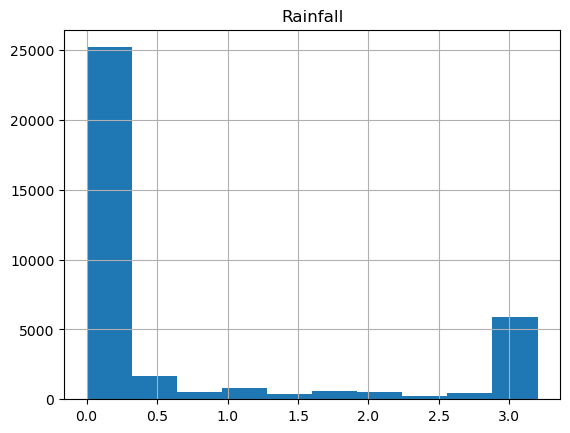

In [473]:
data.hist("Rainfall")

In [474]:
data["Rainfall"]

0        0.0
1        0.4
2        0.0
3        0.0
4        0.0
        ... 
36876    3.2
36877    0.0
36878    0.0
36879    0.0
36880    0.0
Name: Rainfall, Length: 36261, dtype: float64

In [475]:
data["Rainfall"].describe()

count    36261.000000
mean         0.709512
std          1.207785
min          0.000000
25%          0.000000
50%          0.000000
75%          0.800000
max          3.200000
Name: Rainfall, dtype: float64

In [476]:
data["Evaporation"]=outliers_remove("Evaporation",20.2)

In [477]:
data["Evaporation"].describe()

count    36261.000000
mean         4.965806
std          2.841683
min          0.000000
25%          3.600000
50%          4.600000
75%          5.600000
max         20.200000
Name: Evaporation, dtype: float64

In [478]:
data["WindSpeed9am"]=outliers_remove("WindSpeed9am",59.0)

In [479]:
data["WindSpeed9am"].describe()

count    36261.000000
mean        14.193265
std          8.905769
min          0.000000
25%          7.000000
50%         13.000000
75%         19.000000
max         59.000000
Name: WindSpeed9am, dtype: float64

In [480]:
data["WindSpeed3pm"]=outliers_remove("WindSpeed3pm",57.0)

In [481]:
data["WindSpeed3pm"].describe()

count    36261.000000
mean        18.878630
std          8.714056
min          0.000000
25%         13.000000
50%         19.000000
75%         24.000000
max         57.000000
Name: WindSpeed3pm, dtype: float64

In [482]:
def outliers_remove1(col,low):
    return np.where(data[col]<low,low,data[col])

In [483]:
data["Humidity9am"]=outliers_remove1("Humidity9am",20.5)

In [484]:
data["Humidity9am"].describe()

count    36261.00000
mean        69.18331
std         18.01415
min         20.50000
25%         58.00000
50%         70.00000
75%         83.00000
max        100.00000
Name: Humidity9am, dtype: float64

In [485]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'Year', 'Month', 'Day'],
      dtype='object')

In [486]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
0,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,SSE,...,1022.2,1.0,1.0,9.1,13.3,No,0.0,2009,5,18
1,Launceston,1.1,14.5,0.4,4.6,8.4,SSW,50.0,E,SW,...,1002.4,5.0,5.0,1.3,13.7,No,0.0,2009,7,3
2,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,SSE,...,1021.9,6.0,4.0,22.7,24.4,No,0.2,2010,2,18
3,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,SW,...,1014.9,6.0,1.0,20.0,26.1,No,0.0,2010,3,4
4,GoldCoast,14.6,25.3,0.0,4.6,8.4,NNW,43.0,WNW,N,...,1015.0,5.0,5.0,22.2,22.6,No,0.4,2010,9,9


In [487]:
data[numerical]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,0.0
1,1.1,14.5,0.4,4.6,8.4,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,5.0,5.0,1.3,13.7,0.0
2,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,0.2
3,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,0.0
4,14.6,25.3,0.0,4.6,8.4,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,5.0,5.0,22.2,22.6,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,10.1,14.2,3.2,3.4,0.0,46.0,19.0,15.0,84.0,81.0,1016.2,1014.5,7.0,8.0,10.4,13.9,9.0
36877,6.3,26.0,0.0,5.0,10.6,37.0,9.0,26.0,38.0,45.0,1024.2,1021.5,1.0,1.0,18.4,23.5,0.0
36878,20.5,31.7,0.0,7.0,11.1,37.0,20.0,13.0,54.0,39.0,1012.6,1009.0,2.0,5.0,25.7,30.5,0.0
36879,6.3,23.3,0.0,5.2,11.6,39.0,9.0,20.0,50.0,41.0,1023.9,1019.9,0.0,1.0,16.4,20.9,0.0


In [488]:
data[categorical1]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Hobart,NW,WSW,SSE,No
1,Launceston,SSW,E,SW,No
2,Williamtown,SSE,SSE,SSE,No
3,PerthAirport,SW,SSE,SW,No
4,GoldCoast,NNW,WNW,N,No
...,...,...,...,...,...
36876,Perth,NNE,NNE,N,Yes
36877,PerthAirport,W,N,WSW,No
36878,Darwin,E,E,ESE,No
36879,Perth,SSW,E,SSW,No


In [489]:
X=data.drop("RISK_MM",axis=1)
y=data["RISK_MM"]

In [490]:
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,SSE,...,1023.1,1022.2,1.0,1.0,9.1,13.3,No,2009,5,18
1,Launceston,1.1,14.5,0.4,4.6,8.4,SSW,50.0,E,SW,...,1001.5,1002.4,5.0,5.0,1.3,13.7,No,2009,7,3
2,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,SSE,...,1020.9,1021.9,6.0,4.0,22.7,24.4,No,2010,2,18
3,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,SW,...,1018.3,1014.9,6.0,1.0,20.0,26.1,No,2010,3,4
4,GoldCoast,14.6,25.3,0.0,4.6,8.4,NNW,43.0,WNW,N,...,1020.3,1015.0,5.0,5.0,22.2,22.6,No,2010,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,Perth,10.1,14.2,3.2,3.4,0.0,NNE,46.0,NNE,N,...,1016.2,1014.5,7.0,8.0,10.4,13.9,Yes,2011,6,14
36877,PerthAirport,6.3,26.0,0.0,5.0,10.6,W,37.0,N,WSW,...,1024.2,1021.5,1.0,1.0,18.4,23.5,No,2010,9,24
36878,Darwin,20.5,31.7,0.0,7.0,11.1,E,37.0,E,ESE,...,1012.6,1009.0,2.0,5.0,25.7,30.5,No,2011,5,6
36879,Perth,6.3,23.3,0.0,5.2,11.6,SSW,39.0,E,SSW,...,1023.9,1019.9,0.0,1.0,16.4,20.9,No,2010,10,12


In [491]:
y

0        0.0
1        0.0
2        0.2
3        0.0
4        0.4
        ... 
36876    9.0
36877    0.0
36878    0.0
36879    0.0
36880    0.0
Name: RISK_MM, Length: 36261, dtype: float64

In [492]:
X_numerical=X.drop(["RainToday","Location","WindGustDir","WindDir9am","WindDir3pm"],axis=1)

In [493]:
X_numerical.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'],
      dtype='object')

In [494]:
X_numerical

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,2009,5,18
1,1.1,14.5,0.4,4.6,8.4,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,5.0,5.0,1.3,13.7,2009,7,3
2,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,2010,2,18
3,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,2010,3,4
4,14.6,25.3,0.0,4.6,8.4,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,5.0,5.0,22.2,22.6,2010,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,10.1,14.2,3.2,3.4,0.0,46.0,19.0,15.0,84.0,81.0,1016.2,1014.5,7.0,8.0,10.4,13.9,2011,6,14
36877,6.3,26.0,0.0,5.0,10.6,37.0,9.0,26.0,38.0,45.0,1024.2,1021.5,1.0,1.0,18.4,23.5,2010,9,24
36878,20.5,31.7,0.0,7.0,11.1,37.0,20.0,13.0,54.0,39.0,1012.6,1009.0,2.0,5.0,25.7,30.5,2011,5,6
36879,6.3,23.3,0.0,5.2,11.6,39.0,9.0,20.0,50.0,41.0,1023.9,1019.9,0.0,1.0,16.4,20.9,2010,10,12


# Converting categorical variables to numerical one by one hot encoding

In [495]:
X_1 = pd.concat([X_numerical,
                pd.get_dummies(X.RainToday,drop_first=True),
                pd.get_dummies(X.Location,drop_first=True), 
                pd.get_dummies(X.WindGustDir,drop_first=True),
                pd.get_dummies(X.WindDir9am,drop_first=True),
                pd.get_dummies(X.WindDir3pm,drop_first=True)],axis=1)

In [496]:
X_1.shape

(36261, 110)

# Checking Multicollinearity by Variance Inflation Factor

In [497]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_1.columns
  
# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(X_1.values, i)
                          for i in range(len(X_1.columns))]
  
print(vif_data.sort_values(by="VIF"))

        feature            VIF
81          ESE       1.832553
46   PearceRAAF       1.896578
80          ENE       1.926021
29        Cobar       1.935401
47      Penrith       1.941998
..          ...            ...
1       MaxTemp     352.153007
15      Temp3pm     367.040419
16         Year   41810.743172
11  Pressure3pm  495986.736155
10  Pressure9am  499334.214270

[110 rows x 2 columns]


# Train-test split the data

In [498]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3,random_state=1)

In [499]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [500]:
y_pred=model.predict(X_test)

In [501]:
from sklearn.metrics import r2_score, mean_squared_error
r2_scr = r2_score(y_test,y_pred) 
mse = mean_squared_error(y_test, y_pred)

In [502]:
r2_scr

0.211612824224493

In [503]:
mse

55.97227135675473

# Ridge Regression

In [504]:
from sklearn.linear_model import Ridge

In [505]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

Ridge()

In [506]:
y_pred=clf.predict(X_test)

In [507]:
r2_scr = r2_score(y_test,y_pred) 
mse = mean_squared_error(y_test, y_pred)

In [508]:
r2_scr

0.2116192047385259

In [509]:
mse

55.97181836630306

# Lasso Regression

In [510]:
from sklearn.linear_model import Lasso

In [511]:
clf1 = Lasso(alpha=1.0)
clf1.fit(X_train, y_train)

Lasso()

In [512]:
y_pred=clf1.predict(X_test)

In [513]:
r2_scr = r2_score(y_test,y_pred) 
mse = mean_squared_error(y_test, y_pred)

In [514]:
r2_scr

0.18705006481461206

In [515]:
mse

57.716127011951265

# Comparison of all the models and their MAE,MSE

In [516]:
table=pd.DataFrame({
        "Model":['Linear Regression','Ridge Regression','Lasso Regression'],
        "R2_Score":[0.212,0.212,0.187],
        "MSE":[55.97,55.97,57.71]        
})
table

,Model,R2_Score,MSE
0,Linear Regression,0.212,55.97
1,Ridge Regression,0.212,55.97
2,Lasso Regression,0.187,57.71


<AxesSubplot:xlabel='Model', ylabel='MSE'>

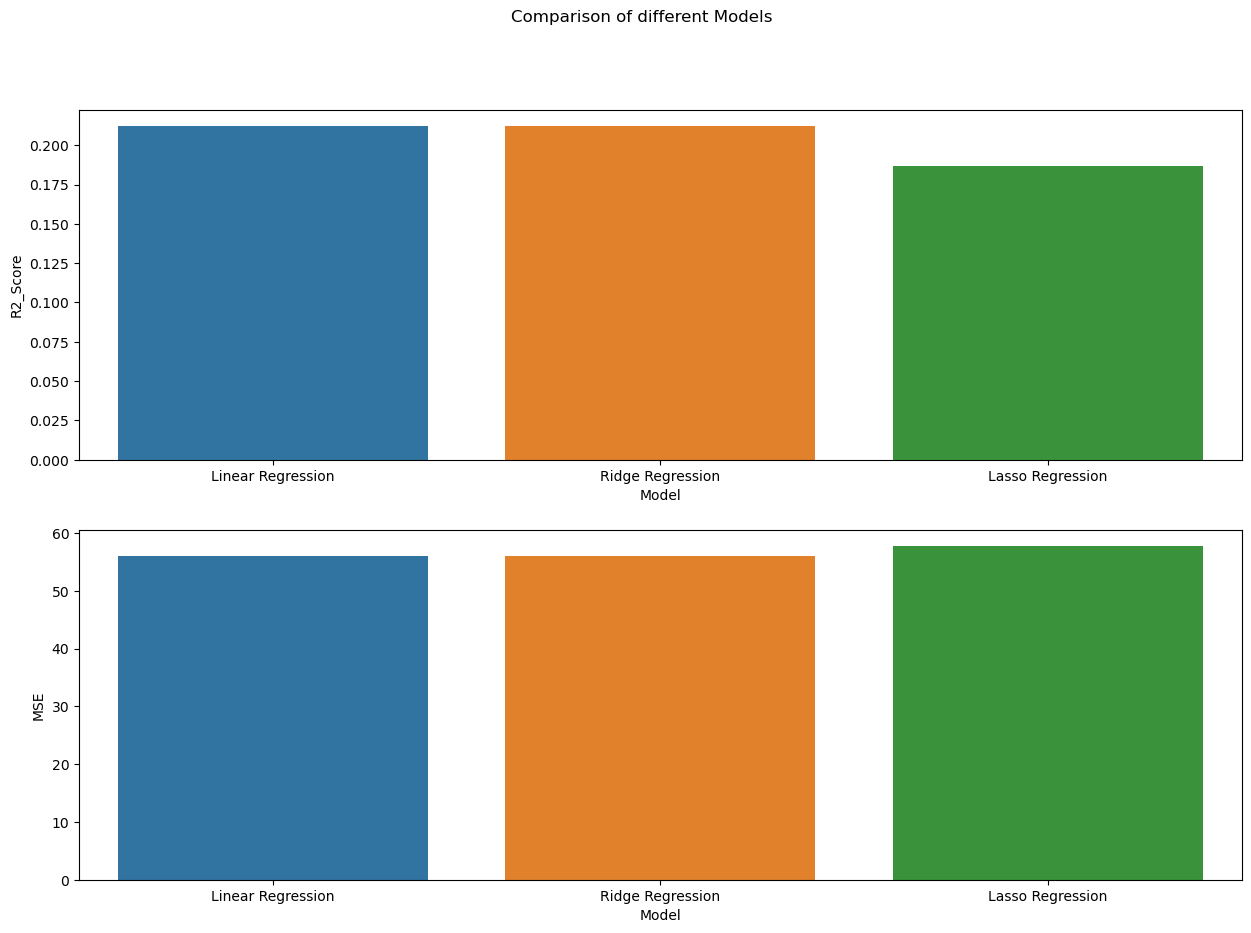

In [518]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

fig.suptitle('Comparison of different Models')

sns.barplot(ax=axes[0], data=table, x='Model', y='R2_Score')
sns.barplot(ax=axes[1], data=table, x='Model', y='MSE')